<a href="https://colab.research.google.com/github/aswathyachuzz/image_classification/blob/main/Major_Project_Aswathy_Stalin_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 54s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


C:\Users\aswathy stalin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Index of each class')

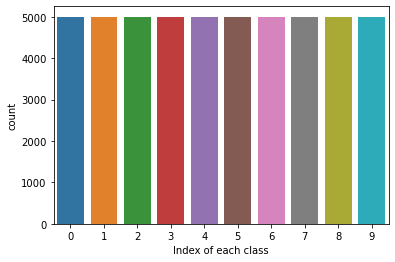

In [ ]:
sns.countplot(np.squeeze(y_train))
plt.xlabel("Index of each class")

In [ ]:
#normalize your data
x_train=x_train/255
x_test=x_test/255

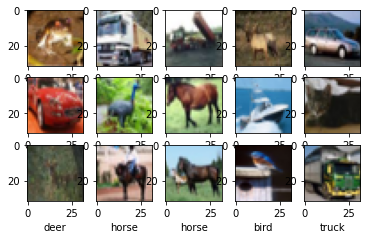

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(6,6))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [ ]:
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
1563/1563 [==============================] - 33s 21ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 31s 20ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 32s 21ms/step - loss: -41.0939 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 32s 21ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 33s 21ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 33s 21ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 33s 21ms/step - loss: -41.0938 - accu

In [ ]:
pred=model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: -41.0938 - accuracy: 0.1000


[-41.093849182128906, 0.10000000149011612]

1/1 [==============================] - 0s 17ms/step


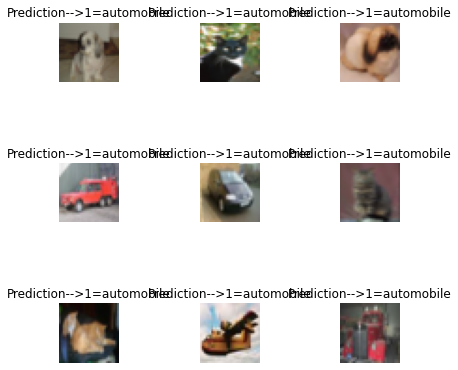

In [ ]:
plt.figure(figsize=(6,6))
n=x_test.shape[0]
for num,i in enumerate(np.random.randint(n,size=9)):
    pred_prob=model.predict(x_test[i][np.newaxis, ...])
    pred_class=np.argmax(pred_prob).astype(int)
    plt.subplot(3,6,2*num+1)
    plt.imshow(x_test[i])
    plt.title(f'Prediction-->{pred_class}={class_names[pred_class]}')
    plt.axis('off')
plt.tight_layout()
              